In [36]:
#Three-Qubit Gates
#Amitava Chakraborty - 15th Jan 2018
from qiskit import IBMQ
# Loading your IBM Q account(s)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-15 13:37:21,572: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [37]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.circuit.library import HGate, RZGate, CXGate, CCXGate, XGate, SwapGate

from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')
q_backend = BasicAer.get_backend('qasm_simulator')

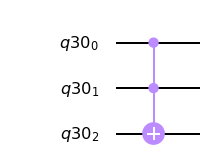

In [38]:
#There are two commonly-used three-qubit gates. 
#Qiskit uses a representation in which the first qubit is on the right-most side of the tensor product
#and the third qubit is on the left-most side

#Toffoli gate (CCX gate) - CONTROL-CONTROL-NOT
#The Toffoli gate flips the third qubit if the first two qubits (LSB) are both 1
#i.e., if a = 1 and b = 1, then flip c
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw(output='mpl')

In [39]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

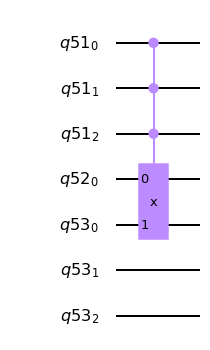

In [69]:
# Multi-control Toffoli gate with clean ancillas
num_controls=3
q_controls = QuantumRegister(num_controls)
q_target = QuantumRegister(1)
qc = QuantumCircuit(q_controls, q_target)

if num_controls > 2:
    num_ancillas = num_controls - 2
    q_ancillas = QuantumRegister(num_controls)
    qc.add_register(q_ancillas)
else:
    num_ancillas = 0
    q_ancillas = None

# apply hadamard on control qubits and toffoli gate
qc.mct(q_controls, q_target[0], q_ancillas, mode='basic')
qc.draw('mpl')

In [41]:
# execute the circuit and obtain statevector result
backend = BasicAer.get_backend('unitary_simulator')
simulated = execute(qc, backend).result().get_unitary(qc)
print(simulated)

[[1.-7.34536490e-17j 0.+0.00000000e+00j 0.+0.00000000e+00j ...
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 1.-5.55111512e-17j 0.+0.00000000e+00j ...
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 1.-5.55111512e-17j ...
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 ...
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j ...
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j ...
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j ...
  0.+0.00000000e+00j 0.+0.00000000e+00j 1.-5.13069625e-16j]]


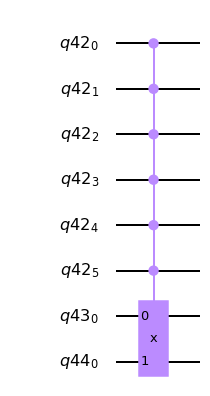

In [52]:
 # Multi-control Toffoli gate with dirty ancillas
num_controls=6
q_controls = QuantumRegister(num_controls)
q_target = QuantumRegister(1)
qc = QuantumCircuit(q_controls, q_target)

q_ancillas = None
if num_controls <= 4:
    num_ancillas = 0
else:
    num_ancillas = 1
    q_ancillas = QuantumRegister(num_ancillas)
    qc.add_register(q_ancillas)

qc.mct(q_controls, q_target[0], q_ancillas, mode='advanced')
qc.draw('mpl')

In [43]:
# execute the circuit and obtain statevector result
backend = BasicAer.get_backend('unitary_simulator')
simulated = execute(qc, backend).result().get_unitary(qc)
print(simulated)

[[ 1.00000000e+00-7.57219454e-15j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.00000000e+00-7.61126321e-15j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.00000000e+00-7.48450511e-15j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  1.00000000e+00-7.92604918e-15j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   1.00000000e+00-7.81067330e-15j  0.00000000e+

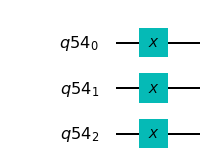

In [70]:
q_init = QuantumRegister(3)
qc_init = QuantumCircuit(q_init)
x=XGate()
qc_init=qc_init.compose(x,[0]).compose(x,[1]).compose(x,[2])
qc_init.draw('mpl')

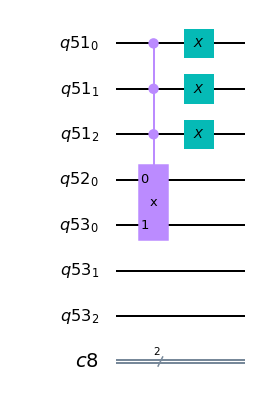

In [71]:
c_measure = ClassicalRegister(2)
qc.add_register(c_measure)
qc = qc.compose(qc_init, qubits=[q_controls[0], q_controls[1], q_controls[2]], inplace=False)
qc.draw('mpl')

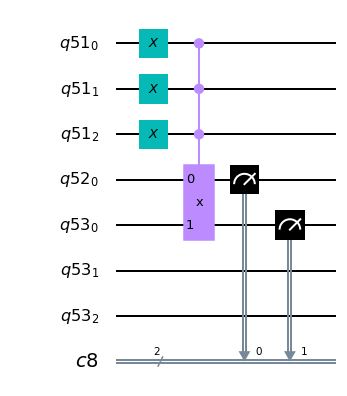

In [72]:
qc = qc.mirror()
qc.measure([q_target[0],q_ancillas[0]],[c_measure[0],c_measure[1]])
qc.draw('mpl')

In [73]:
job = execute(qc, q_backend, shots=15)
print(job.result().get_counts(qc))

{'01': 15}


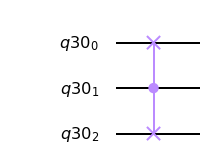

In [56]:
#Controlled swap gate (Fredkin Gate)
#The Fredkin gate, or the controlled swap gate, 
#exchanges the second and third qubits if the first qubit (LSB) is 1
#i.e., if control qubit == 1, then the 2 other qubits states are swaped
qc = QuantumCircuit(q)
#qc.cswap(q[0], q[1], q[2])
qc.cswap(q[1], q[0], q[2])

qc.draw(output='mpl')

In [6]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j]])

# 3-qubit controlled X gate
ref : https://arxiv.org/pdf/quant-ph/9503016.pdf

Parameters
angle (float) – similar to controlled-U1 gates. 
An angle of π/4 yields the 3-qubit controlled X gate, an angle of π/8 the 3-qubit controlled sqrt(X) gate.


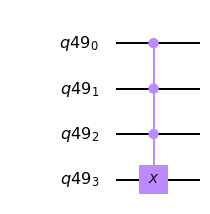

In [61]:
from qiskit.circuit.library import *
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.data[0] = (C3XGate(pi/4), [qr[0], qr[1], qr[2], qr[3]], [])
#qc.data.append((C3XGate(pi/4), [qr[0], qr[1], qr[2], qr[3]], []))
qc.draw('mpl')

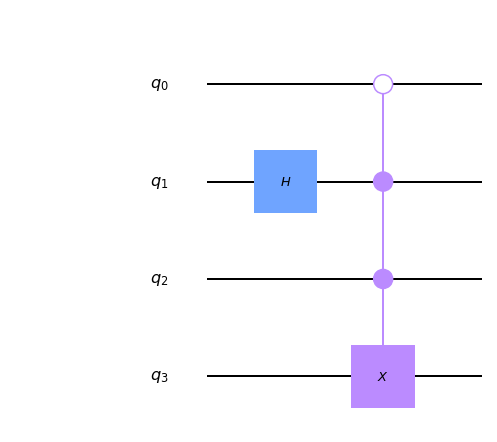

In [66]:
qc = QuantumCircuit(4)
qc.h(1)
cgate = XGate().control(3, ctrl_state=6)
qc.append(cgate, [0, 1, 2, 3])
qc.draw('mpl', scale=1.5)

In [67]:
import qiskit.tools.jupyter
circuit = XOR(5, seed=42)
%circuit_library_info circuit

In [68]:
from qiskit import QuantumCircuit
#from qiskit.extensions import HGate
hgate = HGate()
circ = QuantumCircuit(4)
circ.append(hgate.control(3), [0, 1, 2, 3])
print(circ)

          
q_0: ──■──
       │  
q_1: ──■──
       │  
q_2: ──■──
     ┌─┴─┐
q_3: ┤ H ├
     └───┘
